<a href="https://colab.research.google.com/github/mssabahi/Data_Preparation/blob/main/data_cleaning_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Important Notes
###  To do the data cleaning, some preliminary steps needed to check. Some of them are shown below:


*   Check the dataframe info data types. commands:(df.info() and df.describe())

*   Check categorical data and make sure they are not cosidered as numbers. 
1.  series.astype('category') 
2.  and make sure with assert series_name.dtype=='category'

*   Consider the out of range data with dropping the dara or treating and imputing the data.
*   Consider the duplicate values and rows.
1.   duplicates = df.duplicated(subset = column_names, keep = False)
2.   df[duplicates].sort_values(by = 'name of interest')
*   Treat the duplicated values with the aggregation technique. This technique is usefull when some rows are similar except for some numeric columns. 
1.   column_names = ['col1','col2','col3']
2.   summaries = {'height': 'max', 'weight': 'mean'}
3.   df = df.groupby(by = column_names).agg(summaries).reset_index()
4.   List item

*   Check the nan values with msno.matrix(df)

*   Use fuzzywuzzy library to deal with typos in dataframe.
1.   from fuzzywuzzy import process

*   Steps we need to follow:
1.   Create a list of of names with correct spells. 
2.   Create matches: with the following for loop:


```
An example of matching state names with the correct spelling forms.
categoris = ['California', 'New York']
for i in categories['state']:
  # Find potential matches in a column with typos
    matches = process.extract(state, survey['state'], limit = survey.shape[0])
    # For each potential match match
      for potential_match in matches:
        # If high similarity score
        if potential_match[1] >= 80:
          # Replace typo with correct category
          survey.loc[survey['state'] == potential_match[0], 'state'] = state

match is a tuple of 3 elements. for example in this case match=('New York', 100,56) the last element in this tuple is the index of the row. 

```


*   Another useful command to deal with data with time format.


```
# Convert a column to datetime.
df['col_time'] = pd.to_datetime(df['col_time'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce') 
```






In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from operator import add
import datetime
import os
import sys
import matplotlib
import re
import warnings
warnings.filterwarnings('ignore')
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import pylab
import datetime as dt
import missingno as msno

# pd.set_option('display.max_rows', 5000)
# pd.set_option('display.max_columns', 5000)
# pd.set_option('display.width', 1000)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Data_Science/Data_Cleaning'

In [ ]:
ride_sharing = pd.read_csv(path+'/ride_sharing_new.csv')

In [ ]:
ride_sharing.head()

,Unnamed: 0,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
0,0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male
1,1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male
2,2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male
3,3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male
4,4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male


In [ ]:
# Print the information of ride_sharing
print(ride_sharing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       25760 non-null  int64 
 1   duration         25760 non-null  object
 2   station_A_id     25760 non-null  int64 
 3   station_A_name   25760 non-null  object
 4   station_B_id     25760 non-null  int64 
 5   station_B_name   25760 non-null  object
 6   bike_id          25760 non-null  int64 
 7   user_type        25760 non-null  int64 
 8   user_birth_year  25760 non-null  int64 
 9   user_gender      25760 non-null  object
dtypes: int64(6), object(4)
memory usage: 2.0+ MB
None


The user_type column contains information on whether a user is taking a free ride and takes on the following values:

1 for free riders.
2 for pay per ride.
3 for monthly subscribers.

In [ ]:
# Print summary statistics of user_type column
print(ride_sharing['user_type'].describe())

count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64


In [ ]:
# Convert user_type from integer to category
ride_sharing['user_type_cat'] = ride_sharing['user_type'].astype('category')

In [ ]:
# Write an assert statement confirming the change
assert ride_sharing['user_type_cat'].dtype == 'category'

In [ ]:
# Print new summary statistics 
print(ride_sharing['user_type_cat'].describe())

count     25760
unique        3
top           2
freq      12972
Name: user_type_cat, dtype: int64


### Summing strings and concatenating numbers

In the previous exercise, you were able to identify that category is the correct data type for user_type and convert it in order to extract relevant statistical summaries that shed light on the distribution of user_type.

Another common data type problem is importing what should be numerical values as strings, as mathematical operations such as summing and multiplication lead to string concatenation, not numerical outputs.

In this exercise, you'll be converting the string column duration to the type int. Before that however, you will need to make sure to strip "minutes" from the column in order to make sure pandas reads it as numerical. The pandas package has been imported as pd.

In [ ]:
# Strip duration of minutes
ride_sharing['duration'] = ride_sharing['duration'].str.strip('minutes')
ride_sharing['duration'] = ride_sharing['duration'].astype(int) # Convert duration to integer

# Write an assert statement making sure of conversion
assert ride_sharing['duration'].dtype == 'int'

In [ ]:
ride_sharing.drop(['Unnamed: 0'], axis=1,inplace=True)

In [ ]:
ride_sharing.head()

,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender,user_type_cat
0,12,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male,2
1,24,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male,2
2,8,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male,3
3,4,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male,1
4,11,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male,2


### Tire size constraints
In this lesson, you're going to build on top of the work you've been doing with the ride_sharing DataFrame. You'll be working with the tire_sizes column which contains data on each bike's tire size.

Bicycle tire sizes could be either 26″, 27″ or 29″ and are here correctly stored as a categorical value. In an effort to cut maintenance costs, the ride sharing provider decided to set the maximum tire size to be 27″.

In this exercise, you will make sure the tire_sizes column has the correct range by first converting it to an integer, then setting and testing the new upper limit of 27″ for tire sizes.

In [ ]:
import random
rand_date_ls = []

for i in range(ride_sharing.shape[0]):
    start_date = datetime.date(2018, 1, 1)
    end_date = datetime.date(2020, 2, 1)

    time_between_dates = end_date - start_date
    days_between_dates = time_between_dates.days
    random_number_of_days = random.randrange(days_between_dates)
    random_date = start_date + datetime.timedelta(days=random_number_of_days)

    rand_date_ls.append(random_date)

In [ ]:
tire_sizes_ls = []
available_sizes = [26,27,29, 30, 31]
for i in range(ride_sharing.shape[0]):
    tire_sizes_ls.append( random.choice(available_sizes) )
    

In [ ]:
ride_sharing.shape[0]

25760

In [ ]:
ride_sharing['tire_sizes'] = tire_sizes_ls
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('category')
ride_sharing['tire_sizes'].dtype

CategoricalDtype(categories=[26, 27, 29, 30, 31], ordered=False)

In [ ]:
ride_sharing['ride_date'] = rand_date_ls

In [ ]:
ride_sharing

,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender,user_type_cat,tire_sizes,ride_date
0,12,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male,2,30,2020-01-21
1,24,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male,2,30,2019-12-23
2,8,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male,3,27,2018-11-19
3,4,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male,1,29,2019-05-22
4,11,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male,2,31,2019-07-13
...,...,...,...,...,...,...,...,...,...,...,...,...
25755,11,15,San Francisco Ferry Building (Harry Bridges Pl...,34,Father Alfred E Boeddeker Park,5063,1,2000,Male,1,29,2018-05-27
25756,10,15,San Francisco Ferry Building (Harry Bridges Pl...,34,Father Alfred E Boeddeker Park,5411,2,1998,Male,2,26,2018-11-04
25757,14,15,San Francisco Ferry Building (Harry Bridges Pl...,42,San Francisco City Hall (Polk St at Grove St),5157,2,1995,Male,2,30,2018-06-04
25758,14,15,San Francisco Ferry Building (Harry Bridges Pl...,42,San Francisco City Hall (Polk St at Grove St),4438,2,1995,Male,2,26,2018-01-21


In [ ]:
# Convert tire_sizes to integer
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('int')

# Set all values above 27 to 27
ride_sharing.loc[ride_sharing['tire_sizes'] > 27, 'tire_sizes'] = 27

# Reconvert tire_sizes back to categorical
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('category')

# Print tire size description
print(ride_sharing['tire_sizes'].describe())

count     25760
unique        2
top          27
freq      20585
Name: tire_sizes, dtype: int64


### Back to the future
A new update to the data pipeline feeding into the ride_sharing DataFrame has been updated to register each ride's date. This information is stored in the ride_date column of the type object, which represents strings in pandas.

A bug was discovered which was relaying rides taken today as taken next year. To fix this, you will find all instances of the ride_date column that occur anytime in the future, and set the maximum possible value of this column to today's date. Before doing so, you would need to convert ride_date to a datetime object.

The datetime package has been imported as dt, alongside all the packages you've been using till now.

In [ ]:
ride_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   duration         25760 non-null  int64   
 1   station_A_id     25760 non-null  int64   
 2   station_A_name   25760 non-null  object  
 3   station_B_id     25760 non-null  int64   
 4   station_B_name   25760 non-null  object  
 5   bike_id          25760 non-null  int64   
 6   user_type        25760 non-null  int64   
 7   user_birth_year  25760 non-null  int64   
 8   user_gender      25760 non-null  object  
 9   user_type_cat    25760 non-null  category
 10  tire_sizes       25760 non-null  category
 11  ride_date        25760 non-null  object  
dtypes: category(2), int64(6), object(4)
memory usage: 2.0+ MB


In [ ]:
# Convert ride_date to datetime
ride_sharing['ride_dt'] = pd.to_datetime(ride_sharing['ride_date'])

# Save today's date
today = pd.to_datetime('today') # must be in this format

# Set all in the future to today's date
ride_sharing.loc[ride_sharing['ride_dt'] > today, 'ride_dt'] = today

# # Print maximum of ride_dt column
print(ride_sharing['ride_dt'].max())

2020-01-31 00:00:00


### Finding duplicates
A new update to the data pipeline feeding into ride_sharing has added the ride_id column, which represents a unique identifier for each ride.

The update however coincided with radically shorter average ride duration times and irregular user birth dates set in the future. Most importantly, the number of rides taken has increased by 20% overnight, leading you to think there might be both complete and incomplete duplicates in the ride_sharing DataFrame.

In this exercise, you will confirm this suspicion by finding those duplicates. A sample of ride_sharing is in your environment, as well as all the packages you've been working with thus far.

In [ ]:
ride_sharing.shape

(25760, 13)

In [ ]:
# Find duplicates
duplicates = ride_sharing.duplicated(subset=['bike_id'], keep= False)
duplicates


0        True
1        True
2        True
3        True
4        True
         ... 
25755    True
25756    True
25757    True
25758    True
25759    True
Length: 25760, dtype: bool

In [ ]:
# Sort your duplicated rides name it duplicated_rides dataframe
duplicated_rides = ride_sharing[duplicates].sort_values(by='bike_id')
duplicated_rides.shape

(25717, 13)

In [ ]:
# Print relevant columns of duplicated_rides
print(duplicated_rides[['bike_id','duration','user_birth_year']])

       bike_id  duration  user_birth_year
3638        11        12             1988
6088        11         5             1985
10857       11         4             1987
10045       27        13             1989
16104       27        10             1970
...        ...       ...              ...
8812      6638        10             1986
6815      6638         5             1995
8456      6638         7             1983
8300      6638         6             1962
8380      6638         8             1984

[25717 rows x 3 columns]


### Treating duplicates (Incomplete duplicates)
In the last exercise, you were able to verify that the new update feeding into ride_sharing contains a bug generating both complete and incomplete duplicated rows for some values of the ride_id column, with occasional discrepant values for the user_birth_year and duration columns.

In this exercise, you will be treating those duplicated rows by first dropping complete duplicates, and then merging the incomplete duplicate rows into one while keeping the average duration, and the minimum user_birth_year for each set of incomplete duplicate rows.

In [ ]:
# Drop complete duplicates from ride_sharing
ride_dup = ride_sharing.drop_duplicates()


In [ ]:
# Create statistics dictionary for aggregation function
statistics = {'user_birth_year': 'min', 'duration': 'mean'}


In [ ]:
# Group by bike_id and compute new statistics
ride_unique = ride_dup.groupby(by=['bike_id']).agg(statistics).reset_index()


In [ ]:
# Find duplicated values again
duplicates = ride_unique.duplicated(subset = 'bike_id', keep = False)
duplicated_rides = ride_unique[duplicates == True]


In [ ]:
# Assert duplicates are processed
assert duplicated_rides.shape[0] == 0

# Section 2

### Finding consistency
In this exercise and throughout this chapter, you'll be working with the airlines DataFrame which contains survey responses on the San Francisco Airport from airline customers.

The DataFrame contains flight metadata such as the airline, the destination, waiting times as well as answers to key questions regarding cleanliness, safety, and satisfaction. Another DataFrame named categories was created, containing all correct possible values for the survey columns.

In this exercise, you will use both of these DataFrames to find survey answers with inconsistent values, and drop them, effectively performing an outer and inner join on both these DataFrames as seen in the video exercise. The pandas package has been imported as pd, and the airlines and categories DataFrames are in your environment.

In [ ]:
airlines = pd.read_csv(path+'/airlines_final.csv') 
airlines.reset_index(drop=True )
airlines.drop(['Unnamed: 0'], inplace=True, axis=1)

In [ ]:
airlines.head()

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified
4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified


In [ ]:
airlines['cleanliness'][2] = 'Unacceptable'
airlines['cleanliness'][12] ='Unacceptable'

In [ ]:
airlines['satisfaction'].unique()

array(['Very satisfied', 'Neutral', 'Somewhat satsified',
       'Somewhat unsatisfied', 'Very unsatisfied'], dtype=object)

In [ ]:
airlines['cleanliness'].unique()

array(['Clean', 'Unacceptable', 'Somewhat clean', 'Average',
       'Somewhat dirty', 'Dirty'], dtype=object)

In [ ]:
airlines['safety'].unique()

array(['Neutral', 'Very safe', 'Somewhat safe', 'Very unsafe',
       'Somewhat unsafe'], dtype=object)

In [ ]:
# Print unique values of survey columns in airlines
print('Cleanliness: ', airlines['cleanliness'].unique(), "\n")
print('Safety: ', airlines['safety'].unique(), "\n")
print('Satisfaction: ', airlines['satisfaction'].unique(), "\n")

Cleanliness:  ['Clean' 'Unacceptable' 'Somewhat clean' 'Average' 'Somewhat dirty'
 'Dirty'] 

Safety:  ['Neutral' 'Very safe' 'Somewhat safe' 'Very unsafe' 'Somewhat unsafe'] 

Satisfaction:  ['Very satisfied' 'Neutral' 'Somewhat satsified' 'Somewhat unsatisfied'
 'Very unsatisfied'] 



### The reference dataframe

In [ ]:
cat_dic = {'cleanliness': ['Clean','Average','Somewhat clean','Somewhat dirty', 'Dirty'],
          'safety': ['Neutral','Very safe','Somewhat safe','Very unsafe','Somewhat unsafe'],
          'satisfaction': ['Very satisfied', 'Neutral', 'Somewhat satisfied','Somewhat unsatisfied','Very unsatisfied']}
categories = pd.DataFrame(cat_dic)
categories

,cleanliness,safety,satisfaction
0,Clean,Neutral,Very satisfied
1,Average,Very safe,Neutral
2,Somewhat clean,Somewhat safe,Somewhat satisfied
3,Somewhat dirty,Very unsafe,Somewhat unsatisfied
4,Dirty,Somewhat unsafe,Very unsatisfied


In [ ]:
# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines.cleanliness).difference(categories['cleanliness'])
cat_clean

{'Unacceptable'}

In [ ]:
# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)
cat_clean_rows
# return a series

0       False
1       False
2        True
3       False
4       False
        ...  
2472    False
2473    False
2474    False
2475    False
2476    False
Name: cleanliness, Length: 2477, dtype: bool

In [ ]:
# Print rows with inconsistent category
airlines[cat_clean_rows]

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Unacceptable,Somewhat safe,Neutral
12,3104,Tuesday,UNITED,SPOKANE,West US,Small,Gates 70-90,2018-12-31,107.0,Unacceptable,Very safe,Somewhat satsified


In [ ]:
# Print rows with consistent categories only
airlines[~cat_clean_rows]


,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified
4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified
5,634,Thursday,ALASKA,NEWARK,East US,Hub,Gates 50-59,2018-12-31,140.0,Somewhat clean,Very safe,Very satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...
2472,1475,Tuesday,ALASKA,NEW YORK-JFK,East US,Hub,Gates 50-59,2018-12-31,280.0,Somewhat clean,Neutral,Somewhat satsified
2473,2222,Thursday,SOUTHWEST,PHOENIX,West US,Hub,Gates 20-39,2018-12-31,165.0,Clean,Very safe,Very satisfied
2474,2684,Friday,UNITED,ORLANDO,East US,Hub,Gates 70-90,2018-12-31,92.0,Clean,Very safe,Very satisfied
2475,2549,Tuesday,JETBLUE,LONG BEACH,West US,Small,Gates 1-12,2018-12-31,95.0,Clean,Somewhat safe,Very satisfied


### Inconsistent categories
In this exercise, you'll be revisiting the airlines DataFrame from the previous lesson.

As a reminder, the DataFrame contains flight metadata such as the airline, the destination, waiting times as well as answers to key questions regarding cleanliness, safety, and satisfaction on the San Francisco Airport.

In this exercise, you will examine two categorical columns from this DataFrame, dest_region and dest_size respectively, assess how to address them and make sure that they are cleaned and ready for analysis. The pandas package has been imported as pd, and the airlines DataFrame is in your environment.

In [ ]:
# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())


['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']


In [ ]:
# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower()
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})

In [ ]:
airlines['dest_region'].unique()

array(['asia', 'canada/mexico', 'west us', 'east us', 'midwest us',
       'middle east', 'europe', 'central/south america',
       'australia/new zealand'], dtype=object)

In [ ]:
# Remove white spaces from `dest_size`
airlines['dest_size'] = airlines['dest_size'].str.strip()


In [ ]:
# Verify changes have been effected
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' 'Medium' 'Large']


### Remapping categories
To better understand survey respondents from airlines, you want to find out if there is a relationship between certain responses and the day of the week and wait time at the gate.

The airlines DataFrame contains the day and wait_min columns, which are categorical and numerical respectively. The day column contains the exact day a flight took place, and wait_min contains the amount of minutes it took travelers to wait at the gate. To make your analysis easier, you want to create two new categorical variables:

wait_type: 'short' for 0-60 min, 'medium' for 60-180 and long for 180+
day_week: 'weekday' if day is in the weekday, 'weekend' if day is in the weekend.
The pandas and numpy packages have been imported as pd and np. Let's create some new categorical data!

In [ ]:
# Create ranges for categories
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']


In [ ]:
# Create wait_type column
airlines['wait_type'] = pd.cut(airlines['wait_min'], bins = label_ranges, 
                                labels = label_names)
airlines.head()

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction,wait_type
0,1351,Tuesday,UNITED INTL,KANSAI,asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied,medium
1,373,Friday,ALASKA,SAN JOSE DEL CABO,canada/mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied,medium
2,2820,Thursday,DELTA,LOS ANGELES,west us,Hub,Gates 40-48,2018-12-31,70.0,Unacceptable,Somewhat safe,Neutral,medium
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,west us,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified,long
4,2992,Wednesday,AMERICAN,MIAMI,east us,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified,long


In [ ]:
# Create mappings and replace
mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday': 'weekday', 
            'Thursday': 'weekday', 'Friday': 'weekday', 
            'Saturday': 'weekend', 'Sunday': 'weekend'}

airlines['day_week'] = airlines['day'].replace(mappings)

In [ ]:
airlines.head()

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction,wait_type,day_week
0,1351,Tuesday,UNITED INTL,KANSAI,asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied,medium,weekday
1,373,Friday,ALASKA,SAN JOSE DEL CABO,canada/mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied,medium,weekday
2,2820,Thursday,DELTA,LOS ANGELES,west us,Hub,Gates 40-48,2018-12-31,70.0,Unacceptable,Somewhat safe,Neutral,medium,weekday
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,west us,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified,long,weekday
4,2992,Wednesday,AMERICAN,MIAMI,east us,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified,long,weekday


### Removing titles and taking names
While collecting survey respondent metadata in the airlines DataFrame, the full name of respondents was saved in the full_name column. However upon closer inspection, you found that a lot of the different names are prefixed by honorifics such as "Dr.", "Mr.", "Ms." and "Miss".

Your ultimate objective is to create two new columns named first_name and last_name, containing the first and last names of respondents respectively. Before doing so however, you need to remove honorifics.

The airlines DataFrame is in your environment, alongside pandas as pd.

In [ ]:
# # Replace "Dr." with empty string ""
# airlines['full_name'] = airlines['full_name'].str.replace("Dr","")

# # Replace "Mr." with empty string ""
# airlines['full_name'] = airlines['full_name'].str.replace("Mr","")

# # Replace "Miss" with empty string ""
# airlines['full_name'] = airlines['full_name'].str.replace("Miss","")


# # Replace "Ms." with empty string ""
# airlines['full_name'] = airlines['full_name'].str.replace("Ms.","")


# # Assert that full_name has no honorifics
# assert airlines['full_name'].str.contains('Ms.|Mr.|Miss|Dr.').any() == False

### Keeping it descriptive
To further understand travelers' experiences in the San Francisco Airport, the quality assurance department sent out a qualitative questionnaire to all travelers who gave the airport the worst score on all possible categories. The objective behind this questionnaire is to identify common patterns in what travelers are saying about the airport.

Their response is stored in the survey_response column. Upon a closer look, you realized a few of the answers gave the shortest possible character amount without much substance. In this exercise, you will isolate the responses with a character count higher than 40 , and make sure your new DataFrame contains responses with 40 characters or more using an assert statement.


\

# Section 3
Uniform currencies
In this exercise and throughout this chapter, you will be working with a retail banking dataset stored in the banking DataFrame. The dataset contains data on the amount of money stored in accounts, their currency, amount invested, account opening date and last transaction date that were consolidated from American and European branches.

You are tasked with understanding the average account size and how investments vary by the size of account, however in order to produce this analysis accurately, you first need to unify the currency amount into dollars. The pandas package has been imported as pd, and the banking DataFrame is in your environment.

In [ ]:
banking = pd.read_csv(path+'/banking_dirty.csv')
banking.drop('Unnamed: 0', inplace=True, axis=1)

# The csv file doesnt havr currency information. It was generated with a random function.
cur_choice_ls = ['dollar','euro']
cur_ls = []

for i in range(banking.shape[0]):
    cur_ls.append( random.choice(cur_choice_ls) )

banking['acct_cur'] = cur_ls
    
banking.head()

,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction,acct_cur
0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19,euro
1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18,euro
2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18,euro
3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18,euro
4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18,dollar


In [ ]:
banking.isnull().sum()

cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
acct_cur            0
dtype: int64

In [ ]:
# Find values of acct_cur that are equal to 'euro'
acct_eu = banking['acct_cur'] == 'euro'
acct_eu

0      True
1      True
2      True
3      True
4     False
      ...  
95     True
96     True
97    False
98    False
99     True
Name: acct_cur, Length: 100, dtype: bool

In [ ]:
# Convert acct_amount where it is in euro to dollars
banking.loc[banking['acct_cur']== 'euro', 'acct_amount' ] = banking.loc[banking['acct_cur']== 'euro', 'acct_amount' ] * 1.1

In [ ]:
# Unify acct_cur column by changing 'euro' values to 'dollar'
banking.loc[banking['acct_cur']== 'euro', 'acct_cur' ] = 'dollar'

In [ ]:
# Assert that only dollar currency remains
assert banking['acct_cur'].unique() == 'dollar'

### Uniform dates
After having unified the currencies of your different account amounts, you want to add a temporal dimension to your analysis and see how customers have been investing their money given the size of their account over each year. The account_opened column represents when customers opened their accounts and is a good proxy for segmenting customer activity and investment over time.

However, since this data was consolidated from multiple sources, you need to make sure that all dates are of the same format. You will do so by converting this column into a datetime object, while making sure that the format is inferred and potentially incorrect formats are set to missing. The banking DataFrame is in your environment and pandas was imported as pd.

In [ ]:
# Print the header of account_opend
print(banking['account_opened'].head())

0    02-09-18
1    28-02-19
2    25-04-18
3    07-11-17
4    14-05-18
Name: account_opened, dtype: object


In [ ]:
# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce') 

In [ ]:
# Get year of account opened
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')

In [ ]:
# Print acct_year
print(banking['acct_year'])

0     2018
1     2019
2     2018
3     2017
4     2018
      ... 
95    2018
96    2017
97    2017
98    2017
99    2017
Name: acct_year, Length: 100, dtype: object


### Cross field or no cross field?
Throughout this course, you've been immersed in a variety of data cleaning problems from range constraints, data type constraints, uniformity and more.

In this lesson, you were introduced to cross field validation as a means to sanity check your data and making sure you have strong data integrity.

Now, you will map different applicable concepts and techniques to their respective categories.

### How's our data integrity?
New data has been merged into the banking DataFrame that contains details on how investments in the inv_amount column are allocated across four different funds A, B, C and D.

Furthermore, the age and birthdays of customers are now stored in the age and birth_date columns respectively.

You want to understand how customers of different age groups invest. However, you want to first make sure the data you're analyzing is correct. You will do so by cross field checking values of inv_amount and age against the amount invested in different funds and customers' birthdays. Both pandas and datetime have been imported as pd and dt respectively.

In [ ]:
# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

In [ ]:

# Find rows where fund_columns row sum == inv_amount
inv_equ = banking[['fund_A', 'fund_B', 'fund_C', 'fund_D']].sum(axis=1) == banking['inv_amount']
inv_equ

0      True
1      True
2      True
3      True
4     False
      ...  
95     True
96     True
97     True
98     True
99     True
Length: 100, dtype: bool

In [ ]:
# Store consistent and inconsistent data
consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]

# Store consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])

Number of inconsistent investments:  8


In [ ]:
# Store today's date and find ages
today = dt.date.today()
ages_manual = pd.to_datetime(banking['acct_year']).dt.year - pd.to_datetime(banking['birth_date']).dt.year
ages_manual


0     56
1     57
2     28
3     32
4     28
      ..
95    44
96    28
97    33
98    48
99    24
Length: 100, dtype: int64

In [ ]:
# Find rows where age column == ages_manual
age_equ = banking['Age'] == ages_manual

# Store consistent and inconsistent data
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~age_equ]

In [ ]:
# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])

Number of inconsistent ages:  100


In [ ]:
banking

,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction,acct_cur,acct_year
0,870A9281,1962-06-09,58,69875.641,51295,30105.0,4138.0,1420.0,15632.0,2018-02-09,22-02-19,dollar,2018
1,166B05B0,1962-12-16,58,41993.006,15050,4995.0,938.0,6696.0,2421.0,2019-02-28,31-10-18,dollar,2019
2,BFC13E88,1990-09-12,34,65850.147,24567,10323.0,4590.0,8469.0,1185.0,2018-04-25,02-04-18,dollar,2018
3,F2158F66,1985-11-03,35,92545.310,23712,3908.0,492.0,6482.0,12830.0,2017-07-11,08-11-18,dollar,2017
4,7A73F334,1990-05-17,30,120512.000,93230,12158.4,51281.0,13434.0,18383.0,2018-05-14,19-07-18,dollar,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,CA507BA1,1974-08-10,46,13430.824,7515,190.0,931.0,1451.0,4943.0,2018-05-26,11-09-19,dollar,2018
96,B99CD662,1989-12-12,31,102122.284,49089,2453.0,7892.0,31486.0,7258.0,2017-04-05,12-03-19,dollar,2017
97,13770971,1984-11-29,36,92750.870,27962,3352.0,7547.0,8486.0,8577.0,2017-08-16,24-04-19,dollar,2017
98,93E78DA3,1969-12-14,51,41942.230,29662,1758.0,11174.0,11650.0,5080.0,2017-09-10,15-04-18,dollar,2017


### Missing investors
Dealing with missing data is one of the most common tasks in data science. There are a variety of types of missingness, as well as a variety of types of solutions to missing data.

You just received a new version of the banking DataFrame containing data on the amount held and invested for new and existing customers. However, there are rows with missing inv_amount values.

You know for a fact that most customers below 25 do not have investment accounts yet, and suspect it could be driving the missingness. The pandas, missingno and matplotlib.pyplot packages have been imported as pd, msno and plt respectively. The banking DataFrame is in your environment.

In [ ]:
banking2 = banking.drop(fund_columns, axis=1)
banking2

,cust_id,birth_date,Age,acct_amount,inv_amount,account_opened,last_transaction,acct_cur,acct_year
0,870A9281,1962-06-09,58,69875.641,51295,2018-02-09,22-02-19,dollar,2018
1,166B05B0,1962-12-16,58,41993.006,15050,2019-02-28,31-10-18,dollar,2019
2,BFC13E88,1990-09-12,34,65850.147,24567,2018-04-25,02-04-18,dollar,2018
3,F2158F66,1985-11-03,35,92545.310,23712,2017-07-11,08-11-18,dollar,2017
4,7A73F334,1990-05-17,30,120512.000,93230,2018-05-14,19-07-18,dollar,2018
...,...,...,...,...,...,...,...,...,...
95,CA507BA1,1974-08-10,46,13430.824,7515,2018-05-26,11-09-19,dollar,2018
96,B99CD662,1989-12-12,31,102122.284,49089,2017-04-05,12-03-19,dollar,2017
97,13770971,1984-11-29,36,92750.870,27962,2017-08-16,24-04-19,dollar,2017
98,93E78DA3,1969-12-14,51,41942.230,29662,2017-09-10,15-04-18,dollar,2017


In [ ]:
inv_amount_series = banking2.inv_amount
inv_amount_series.size
inv_amount_ls = inv_amount_series

# nan_ls = np.repeat(np.nan, 13) 
Start = 0
Stop = len(inv_amount_ls)
limit = 10

# generating 13 random numbers. To creat the condition of the study.Again the csv file doesnt have nan values.
rand_int_ls = [random.randint(Start, Stop) for iter in range(13)]

for i,j  in enumerate(rand_int_ls):
    inv_amount_ls[j] = np.nan
banking2['inv_amount'] = inv_amount_ls

In [ ]:
print(banking2.isna().sum())

cust_id              0
birth_date           0
Age                  0
acct_amount          0
inv_amount          21
account_opened       0
last_transaction     0
acct_cur             0
acct_year            0
dtype: int64


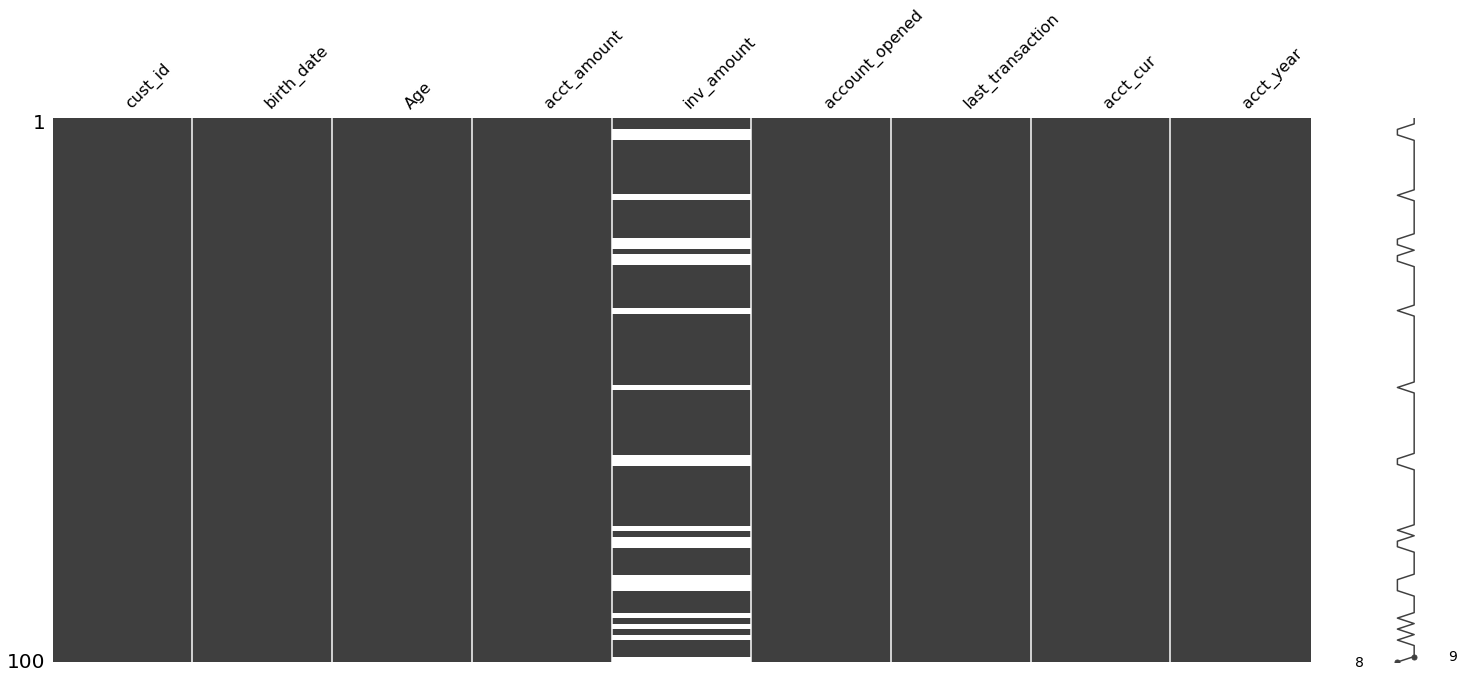

In [ ]:
# Visualize missingness matrix
msno.matrix(banking2)
plt.show()

In [ ]:
# Isolate missing and non missing values of inv_amount
missing_investors = banking2['inv_amount'].isna()
banking2[missing_investors]

,cust_id,birth_date,Age,acct_amount,inv_amount,account_opened,last_transaction,acct_cur,acct_year
2,BFC13E88,1990-09-12,34,6.585015e+04,NaN,2018-04-25,02-04-18,dollar,2018
3,F2158F66,1985-11-03,35,9.254531e+04,NaN,2017-07-11,08-11-18,dollar,2017
14,987DC93E,1978-03-13,42,3.951685e+04,NaN,2018-12-30,06-12-18,dollar,2018
22,96525DA6,1992-11-23,28,9.076236e+04,NaN,2018-07-23,07-08-18,dollar,2018
23,A1815565,1968-09-27,56,8.299604e+04,NaN,2017-07-11,30-09-19,dollar,2017
25,296A9395,1984-05-02,36,3.814756e+04,NaN,2017-12-24,19-02-19,dollar,2017
26,1B55AA1C,1992-10-09,28,7.896042e+04,NaN,2019-01-29,22-11-19,dollar,2019
35,078C654F,1993-10-17,27,8.731264e+04,NaN,2017-04-14,05-08-18,dollar,2017
49,0F0884F6,1961-06-20,59,8.450581e+04,NaN,2018-08-03,24-08-19,dollar,2018
62,93A17007,1991-08-23,29,4.471650e+04,NaN,2017-05-28,08-03-19,dollar,2017


In [ ]:
banking2[~missing_investors]

,cust_id,birth_date,Age,acct_amount,inv_amount,account_opened,last_transaction,acct_cur,acct_year
0,870A9281,1962-06-09,58,69875.641,51295.0,2018-02-09,22-02-19,dollar,2018
1,166B05B0,1962-12-16,58,41993.006,15050.0,2019-02-28,31-10-18,dollar,2019
4,7A73F334,1990-05-17,30,120512.000,93230.0,2018-05-14,19-07-18,dollar,2018
5,472341F2,1980-02-23,40,91440.415,67960.0,2018-12-14,22-04-18,dollar,2018
6,6B094617,1977-08-26,43,89855.980,34549.0,2018-06-02,14-02-19,dollar,2018
...,...,...,...,...,...,...,...,...,...
92,A07D5C92,1990-09-20,30,109535.096,60407.0,2017-11-17,16-01-20,dollar,2017
94,A731C34E,1961-06-03,59,95352.020,84065.0,2017-11-13,13-01-19,dollar,2017
96,B99CD662,1989-12-12,31,102122.284,49089.0,2017-04-05,12-03-19,dollar,2017
97,13770971,1984-11-29,36,92750.870,27962.0,2017-08-16,24-04-19,dollar,2017


In [ ]:
# Isolate missing and non missing values of inv_amount
missing_investors = banking2[banking2['inv_amount'].isna()]
investors = banking2[~banking2['inv_amount'].isna()]

In [ ]:
missing_investors.describe()

,Age,acct_amount,inv_amount
count,21.000000,2.100000e+01,0.0
mean,41.428571,8.387500e+06,NaN
std,10.112227,3.788838e+07,NaN
min,27.000000,1.343082e+04,NaN
25%,34.000000,3.951685e+04,NaN
50%,45.000000,8.450581e+04,NaN
75%,46.000000,9.685480e+04,NaN
max,59.000000,1.737431e+08,NaN


In [ ]:
investors.describe()

,Age,acct_amount,inv_amount
count,79.000000,7.900000e+01,79.000000
mean,43.632911,1.760430e+06,47567.000000
std,10.136475,1.492564e+07,25993.753138
min,27.000000,1.973387e+04,3214.000000
25%,34.000000,6.529522e+04,25503.000000
50%,46.000000,8.771865e+04,48977.000000
75%,52.000000,9.862057e+04,66854.000000
max,63.000000,1.327428e+08,94608.000000


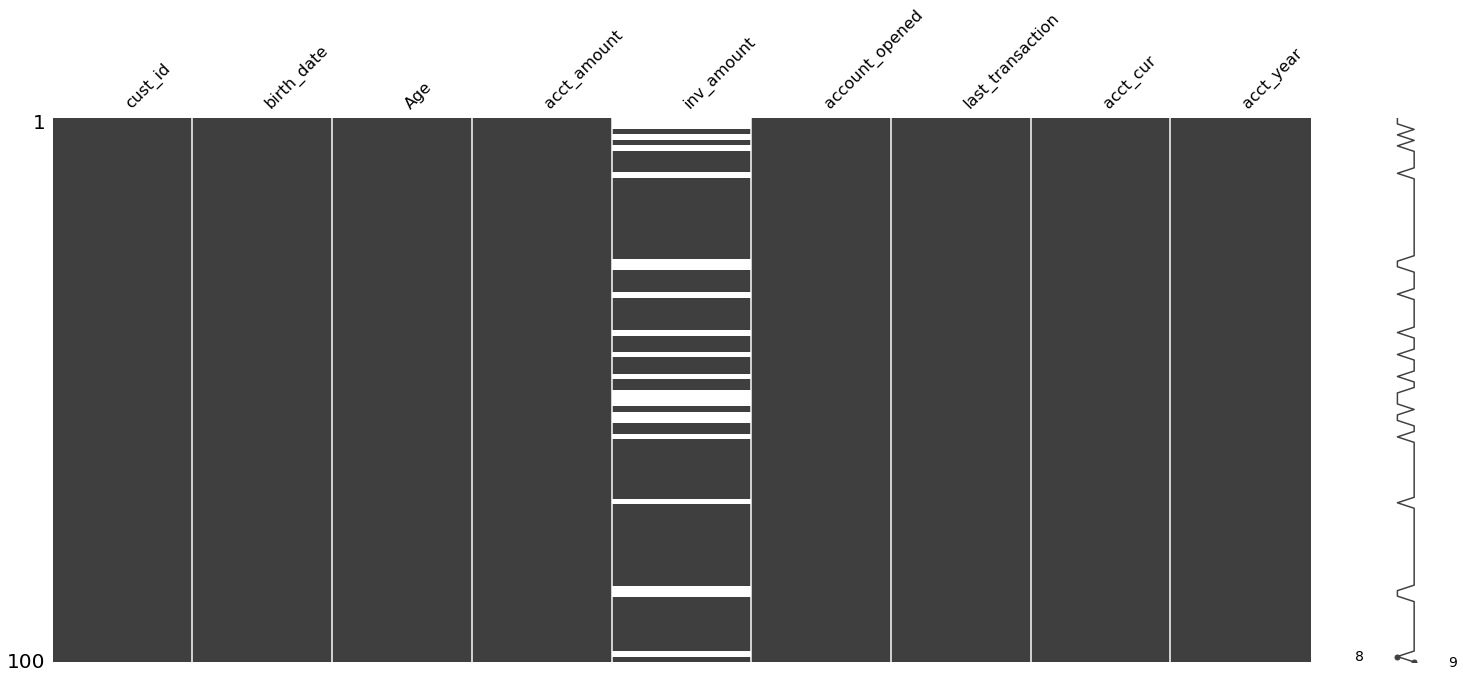

In [ ]:
# Sort banking by age and visualize
banking2_sorted = banking2.sort_values(by='Age')
msno.matrix(banking2_sorted)
plt.show()
# since the nan values were randomly generated, this figure doesnt give us more information.

### Follow the money
In this exercise, you're working with another version of the banking DataFrame that contains missing values for both the cust_id column and the acct_amount column.

You want to produce analysis on how many unique customers the bank has, the average amount held by customers and more. You know that rows with missing cust_id don't really help you, and that on average acct_amount is usually 5 times the amount of inv_amount.

In this exercise, you will drop rows of banking with missing cust_ids, and impute missing values of acct_amount with some domain knowledge.

In [ ]:
cust_id_series = banking.cust_id
acct_amount_series = banking.acct_amount
cust_id_ls = cust_id_series
acct_amount_ls = acct_amount_series

Start = 0
Stop = len(cust_id_ls)
limit = 10

# generating 8 random numbers. To creat the condition of the study.
rand_int_ls1 = [random.randint(Start, Stop) for iter in range(9)]

for i,j  in enumerate(rand_int_ls1):
    cust_id_ls[j] = np.nan

    
# generating 12 random numbers. To creat the condition of the study.
rand_int_ls2 = [random.randint(Start, Stop) for iter in range(12)]

for i,j  in enumerate(rand_int_ls2):
    acct_amount_ls[j] = np.nan


banking['cust_id'] = cust_id_ls
banking['acct_amount'] = acct_amount_ls

In [ ]:
banking.isnull().sum()

cust_id              9
birth_date           0
Age                  0
acct_amount         10
inv_amount           0
fund_A               0
fund_B               0
fund_C               0
fund_D               0
account_opened       0
last_transaction     0
acct_cur             0
acct_year            0
dtype: int64

In [ ]:
cust_id_ls.isnull().sum()

9

In [ ]:
banking.head()

,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction,acct_cur,acct_year
0,870A9281,1962-06-09,58,69875.641,51295,30105.0,4138.0,1420.0,15632.0,2018-02-09,22-02-19,dollar,2018
1,166B05B0,1962-12-16,58,41993.006,15050,4995.0,938.0,6696.0,2421.0,2019-02-28,31-10-18,dollar,2019
2,BFC13E88,1990-09-12,34,65850.147,24567,10323.0,4590.0,8469.0,1185.0,2018-04-25,02-04-18,dollar,2018
3,F2158F66,1985-11-03,35,92545.310,23712,3908.0,492.0,6482.0,12830.0,2017-07-11,08-11-18,dollar,2017
4,7A73F334,1990-05-17,30,120512.000,93230,12158.4,51281.0,13434.0,18383.0,2018-05-14,19-07-18,dollar,2018


In [ ]:
# Drop missing values of cust_id
banking_fullid = banking.dropna(subset = ['cust_id'])

In [ ]:
# Compute estimated inv_amount
acct_imp = banking_fullid['inv_amount'] * 5 

In [ ]:
acct_imp

0     256475
1      75250
2     122835
3     118560
4     466150
       ...  
95     37575
96    245445
97    139810
98    148310
99    160745
Name: inv_amount, Length: 91, dtype: int64

In [ ]:
# Impute missing inv_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({'acct_amount':acct_imp})
# acct_imp is a series. only nan values will be picked up.

In [ ]:
banking_imputed.head()

,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction,acct_cur,acct_year
0,870A9281,1962-06-09,58,69875.641,51295,30105.0,4138.0,1420.0,15632.0,2018-02-09,22-02-19,dollar,2018
1,166B05B0,1962-12-16,58,41993.006,15050,4995.0,938.0,6696.0,2421.0,2019-02-28,31-10-18,dollar,2019
2,BFC13E88,1990-09-12,34,65850.147,24567,10323.0,4590.0,8469.0,1185.0,2018-04-25,02-04-18,dollar,2018
3,F2158F66,1985-11-03,35,92545.310,23712,3908.0,492.0,6482.0,12830.0,2017-07-11,08-11-18,dollar,2017
4,7A73F334,1990-05-17,30,120512.000,93230,12158.4,51281.0,13434.0,18383.0,2018-05-14,19-07-18,dollar,2018


In [ ]:
# Print number of missing values
print(banking_imputed.isna().sum())

cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
acct_cur            0
acct_year           0
dtype: int64


# Section 4
### Minimum edit distance
In the video exercise, you saw how minimum edit distance is used to identify how similar two strings are. As a reminder, minimum edit distance is the minimum number of steps needed to reach from String A to String B, with the operations available being:

Insertion of a new character.
Deletion of an existing character.
Substitution of an existing character.
Transposition of two existing consecutive characters.

                    What is the minimum edit distance from 'sign' to 'sing', and which operation(s) gets you there?
                    
                    1 by transposing 'g' with 'n'.


### The cutoff point
In this exercise, and throughout this chapter, you'll be working with the restaurants DataFrame which has data on various restaurants. Your ultimate goal is to create a restaurant recommendation engine, but you need to first clean your data.

This version of restaurants has been collected from many sources, where the cuisine_type column is riddled with typos, and should contain only italian, american and asian cuisine types. There are so many unique categories that remapping them manually isn't scalable, and it's best to use string similarity instead.

Before doing so, you want to establish the cutoff point for the similarity score using the fuzzywuzzy's process.extract() function by finding the similarity score of the most distant typo of each category.

In [ ]:
restaurants = pd.read_csv(path+'/restaurants_L2.csv')
restaurants.head()

,Unnamed: 0,name,addr,city,phone,type
0,0,arnie morton's of chicago,435 s. la cienega blv .,los angeles,3102461501,american
1,1,art's delicatessen,12224 ventura blvd.,studio city,8187621221,american
2,2,campanile,624 s. la brea ave.,los angeles,2139381447,american
3,3,fenix,8358 sunset blvd. west,hollywood,2138486677,american
4,4,grill on the alley,9560 dayton way,los angeles,3102760615,american


In [ ]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  336 non-null    int64 
 1   name        336 non-null    object
 2   addr        336 non-null    object
 3   city        336 non-null    object
 4   phone       336 non-null    int64 
 5   type        336 non-null    object
dtypes: int64(2), object(4)
memory usage: 15.9+ KB


In [ ]:
restaurants['type'].unique()

array(['american', 'asian', 'italian', 'coffeebar', 'mexican',
       'southwestern', 'steakhouses', 'southern', 'cajun'], dtype=object)

In [ ]:
# restaurants2 = pd.read_csv('./restaurants_L2_dirty.csv')
# restaurants2.head()

In [ ]:
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [ ]:
unique_types = ['america', 'merican', 'amurican', 'americen', 'americann',
       'asiane', 'itali', 'asiann', 'murican', 'italien', 'italian',
       'asiat', 'american', 'americano', 'italiann', 'ameerican',
       'asianne', 'italiano', 'americin', 'ammericann', 'amerycan',
       'aamerican', 'ameriican', 'italiaan', 'asiian', 'asiaan',
       'amerrican', 'ameerrican', 'ammereican', 'asian', 'italianne',
       'italiian', 'itallian']
len(unique_types)

33

In [ ]:
# generating 33 random numbers. To creat the condition of the study. These typos were not available in the csv file.
start = 0
stop = len(unique_types)-1

cuisine_type_ls = [unique_types[random.randint(start, stop)] for iter in range(restaurants.shape[0])]
restaurants['cuisine_type'] = cuisine_type_ls

In [ ]:
# Import process from fuzzywuzzy
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# Store the unique values of cuisine_type in unique_types
unique_types = restaurants['cuisine_type'].unique()
unique_types

array(['italiann', 'americen', 'italiaan', 'asiann', 'ammericann',
       'amerrican', 'asiian', 'ameerrican', 'americin', 'americano',
       'itali', 'america', 'asiane', 'aamerican', 'american', 'ameerican',
       'italien', 'murican', 'asian', 'merican', 'asianne', 'ameriican',
       'italiano', 'asiaan', 'italian', 'amerycan', 'amurican', 'asiat',
       'ammereican', 'americann', 'italiian', 'itallian', 'italianne'],
      dtype=object)

In [ ]:
# Import process from fuzzywuzzy
from fuzzywuzzy import process

# Store the unique values of cuisine_type in unique_types
unique_types = restaurants['cuisine_type'].unique()
unique_types

# Calculate similarity of 'asian' to all values of unique_types
print(process.extract('asian', unique_types, limit = len(unique_types)))

# Calculate similarity of 'american' to all values of unique_types
print(process.extract('american', unique_types, limit = len(unique_types)))
# Calculate similarity of 'italian' to all values of unique_types
print(process.extract('italian', unique_types, limit = len(unique_types)))

[('asian', 100), ('asiann', 91), ('asiian', 91), ('asiane', 91), ('asiaan', 91), ('asianne', 83), ('asiat', 80), ('italiann', 72), ('italiano', 72), ('italianne', 72), ('italian', 67), ('italiaan', 62), ('american', 62), ('amurican', 62), ('italiian', 62), ('itallian', 62), ('amerrican', 57), ('americano', 57), ('aamerican', 57), ('ameerican', 57), ('ameriican', 57), ('americann', 57), ('ammericann', 54), ('ameerrican', 54), ('ammereican', 54), ('america', 50), ('italien', 50), ('murican', 50), ('merican', 50), ('americen', 46), ('americin', 46), ('amerycan', 46), ('itali', 40)]
[('american', 100), ('amerrican', 94), ('americano', 94), ('aamerican', 94), ('ameerican', 94), ('ameriican', 94), ('americann', 94), ('america', 93), ('merican', 93), ('ammericann', 89), ('ameerrican', 89), ('ammereican', 89), ('americen', 88), ('americin', 88), ('amerycan', 88), ('amurican', 88), ('murican', 80), ('asian', 62), ('asiann', 57), ('asiian', 57), ('asiane', 57), ('asiaan', 57), ('asianne', 53), (

### Question
Take a look at the output, what do you think should be the similarity cutoff point when remapping categories?
answer: 80

### Remapping categories II
In the last exercise, you determined that the distance cutoff point for remapping typos of 'american', 'asian', and 'italian' cuisine types stored in the cuisine_type column should be 80.

In this exercise, you're going to put it all together by finding matches with similarity scores equal to or higher than 80 by using fuzywuzzy.process's extract() function, for each correct cuisine type, and replacing these matches with it. Remember, when comparing a string with an array of strings using process.extract(), the output is a list of tuples where each of tuple is as such:

In [ ]:
# Create a list of matches, comparing 'italian' with the cuisine_type column
matches = process.extract('italian', restaurants['cuisine_type'], limit=len(restaurants.cuisine_type))


In [ ]:
# Iterate through the list of matches to italian
for match in matches:
  # Check whether the similarity score is greater than or equal to 80
  if match[1]>80:
    restaurants.loc[restaurants['cuisine_type']==match[0], 'cuisine_type'] = 'italian'



In [ ]:
# Select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
restaurants[restaurants['cuisine_type']=='italian']

,Unnamed: 0,name,addr,city,phone,type,cuisine_type
0,0,arnie morton's of chicago,435 s. la cienega blv .,los angeles,3102461501,american,italian
2,2,campanile,624 s. la brea ave.,los angeles,2139381447,american,italian
8,8,the palm,9001 santa monica blvd.,los angeles,3105508811,american,italian
11,11,valentino,3115 pico blvd.,santa monica,3108294313,italian,italian
15,15,cafe lalo,201 w. 83rd st.,new york,2124966031,coffeebar,italian
...,...,...,...,...,...,...,...
323,323,rumpus,1 tillman pl .,san francisco,4154212300,american,italian
327,327,stars cafe,500 van ness ave.,san francisco,4158614344,american,italian
330,330,ton kiang,3148 geary blvd.,san francisco,4157524440,asian,italian
331,331,vivande porta via,2125 fillmore st.,san francisco,4153464430,italian,italian


In [ ]:
categories = list(['italian', 'asian', 'american'])

In [ ]:
categories

['italian', 'asian', 'american']

In [ ]:
# Iterate through categories
for cuisine in categories:  
  # Create a list of matches, comparing cuisine with the cuisine_type column
  matches = process.extract(cuisine, restaurants['cuisine_type'], limit=len(restaurants.cuisine_type))

  # Iterate through the list of matches
  for match in matches:
     # Check whether the similarity score is greater than or equal to 80
    if match[1] >= 80:
      # If it is, select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
      restaurants.loc[restaurants['cuisine_type'] == match[0]] = cuisine
      
# Inspect the final result
restaurants['cuisine_type'].unique()


array(['italian', 'american', 'asian'], dtype=object)

The following section was about comparing two datasets and I didnt get into it for the time being. 

### Pairs of restaurants
In the last lesson, you cleaned the restaurants dataset to make it ready for building a restaurants recommendation engine. You have a new DataFrame named restaurants_new with new restaurants to train your model on, that's been scraped from a new data source.

You've already cleaned the cuisine_type and city columns using the techniques learned throughout the course. However you saw duplicates with typos in restaurants names that require record linkage instead of joins with restaurants.

In this exercise, you will perform the first step in record linkage and generate possible pairs of rows between restaurants and restaurants_new. Both DataFrames, pandas and recordlinkage are in your environment.

### Question
Now that you've generated your pairs, you've achieved the first step of record linkage. What are the steps remaining to link both restaurants DataFrames, and in what order?
Compare between columns, score the comparison, then link the DataFrames.

### Similar restaurants
In the last exercise, you generated pairs between restaurants and restaurants_new in an effort to cleanly merge both DataFrames using record linkage.

When performing record linkage, there are different types of matching you can perform between different columns of your DataFrames, including exact matches, string similarities, and more.

Now that your pairs have been generated and stored in pairs, you will find exact matches in the city and cuisine_type columns between each pair, and similar strings for each pair in the rest_name column. Both DataFrames, pandas and recordlinkage are in your environment.

In [ ]:
%cd /content/drive/MyDrive/Data_Science/Data_Cleaning

/content/drive/MyDrive/Data_Science/Data_Cleaning


In [ ]:
https://github.com/mssabahi/Data_Preparation.git

SyntaxError: ignored

In [ ]:
path

'/content/drive/MyDrive/Data_Science/Data_Cleaning'

In [ ]:
! git clone https://github.com/mssabahi/Data_Preparation.git

Cloning into 'Data_Preparation'...
